Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/thread_ring/2/'

N = 100_000
R = 50_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:16:16 2025 +0200) (510.27ms elap...,0.397,0.0449,0.451,1.15,0.16,11.08,62.59 C,Nominal
1,(Sat Apr 5 08:16:16 2025 +0200) (509.00ms elap...,1.380,0.0745,0.490,2.13,0.39,29.96,62.59 C,Nominal
2,(Sat Apr 5 08:16:17 2025 +0200) (508.16ms elap...,0.279,0.0317,0.420,0.91,0.17,11.50,62.07 C,Nominal
3,(Sat Apr 5 08:16:17 2025 +0200) (508.93ms elap...,0.275,0.0360,0.413,0.90,0.18,12.16,62.07 C,Nominal
4,(Sat Apr 5 08:16:18 2025 +0200) (508.77ms elap...,0.272,0.0373,0.417,0.90,0.17,11.40,61.53 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(265, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:16:28 2025 +0200) (1008.44ms ela...,39.5,0.0711,1.310,42.45,3.90,98.65,64.30 C,Nominal
1,(Sat Apr 5 08:16:29 2025 +0200) (1004.11ms ela...,36.9,0.0568,0.717,39.96,3.83,97.68,67.75 C,Nominal
2,(Sat Apr 5 08:16:30 2025 +0200) (1004.51ms ela...,37.2,0.0524,0.706,40.18,3.86,99.23,70.44 C,Nominal
3,(Sat Apr 5 08:16:31 2025 +0200) (1005.20ms ela...,37.6,0.0534,0.708,40.65,3.91,99.05,72.67 C,Nominal
4,(Sat Apr 5 08:16:32 2025 +0200) (1005.00ms ela...,37.9,0.0596,0.715,41.00,3.97,99.62,74.86 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:09:09 2025 +0200) (509.10ms elap...,0.2000,0.0000,0.261,0.37,0.06,4.08,50.76 C,Nominal
1,(Sat Apr 5 08:09:09 2025 +0200) (509.26ms elap...,0.2950,0.0308,0.387,0.69,0.22,19.73,50.87 C,Nominal
2,(Sat Apr 5 08:09:10 2025 +0200) (507.74ms elap...,0.9800,0.0000,0.286,1.18,0.20,15.91,50.87 C,Nominal
3,(Sat Apr 5 08:09:10 2025 +0200) (508.17ms elap...,0.0735,0.0000,0.280,0.28,0.05,2.77,50.88 C,Nominal
4,(Sat Apr 5 08:09:11 2025 +0200) (508.31ms elap...,2.1300,0.0000,0.425,2.47,0.28,19.61,50.88 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(289, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 08:09:20 2025 +0200) (1009.92ms ela...,12.40,0.0000,1.05,13.39,1.45,99.11,51.26 C,Nominal
1,(Sat Apr 5 08:09:21 2025 +0200) (1006.41ms ela...,10.70,0.0128,1.19,13.64,1.12,99.12,53.10 C,Nominal
2,(Sat Apr 5 08:09:22 2025 +0200) (1006.15ms ela...,10.60,0.0000,1.13,13.61,1.19,98.89,54.67 C,Nominal
3,(Sat Apr 5 08:09:23 2025 +0200) (1006.51ms ela...,9.42,0.0000,1.15,12.49,1.01,99.64,55.83 C,Nominal
4,(Sat Apr 5 08:09:24 2025 +0200) (1006.57ms ela...,9.72,0.0000,1.13,12.81,1.01,99.62,56.71 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:16:16,0.397,0.0449,0.451,1.15,0.16,11.08,62.59,Nominal,510.27
1,2025-04-05 08:16:16,1.380,0.0745,0.490,2.13,0.39,29.96,62.59,Nominal,509.00
2,2025-04-05 08:16:17,0.279,0.0317,0.420,0.91,0.17,11.50,62.07,Nominal,508.16
3,2025-04-05 08:16:17,0.275,0.0360,0.413,0.90,0.18,12.16,62.07,Nominal,508.93
4,2025-04-05 08:16:18,0.272,0.0373,0.417,0.90,0.17,11.40,61.53,Nominal,508.77


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(265, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:16:28,39.5,0.0711,1.310,42.45,3.90,98.65,64.30,Nominal,1008.44
1,2025-04-05 08:16:29,36.9,0.0568,0.717,39.96,3.83,97.68,67.75,Nominal,1004.11
2,2025-04-05 08:16:30,37.2,0.0524,0.706,40.18,3.86,99.23,70.44,Nominal,1004.51
3,2025-04-05 08:16:31,37.6,0.0534,0.708,40.65,3.91,99.05,72.67,Nominal,1005.20
4,2025-04-05 08:16:32,37.9,0.0596,0.715,41.00,3.97,99.62,74.86,Nominal,1005.00


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:09:09,0.2000,0.0000,0.261,0.37,0.06,4.08,50.76,Nominal,509.10
1,2025-04-05 08:09:09,0.2950,0.0308,0.387,0.69,0.22,19.73,50.87,Nominal,509.26
2,2025-04-05 08:09:10,0.9800,0.0000,0.286,1.18,0.20,15.91,50.87,Nominal,507.74
3,2025-04-05 08:09:10,0.0735,0.0000,0.280,0.28,0.05,2.77,50.88,Nominal,508.17
4,2025-04-05 08:09:11,2.1300,0.0000,0.425,2.47,0.28,19.61,50.88,Nominal,508.31


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(289, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 08:09:20,12.40,0.0000,1.05,13.39,1.45,99.11,51.26,Nominal,1009.92
1,2025-04-05 08:09:21,10.70,0.0128,1.19,13.64,1.12,99.12,53.10,Nominal,1006.41
2,2025-04-05 08:09:22,10.60,0.0000,1.13,13.61,1.19,98.89,54.67,Nominal,1006.15
3,2025-04-05 08:09:23,9.42,0.0000,1.15,12.49,1.01,99.64,55.83,Nominal,1006.51
4,2025-04-05 08:09:24,9.72,0.0000,1.13,12.81,1.01,99.62,56.71,Nominal,1006.57


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


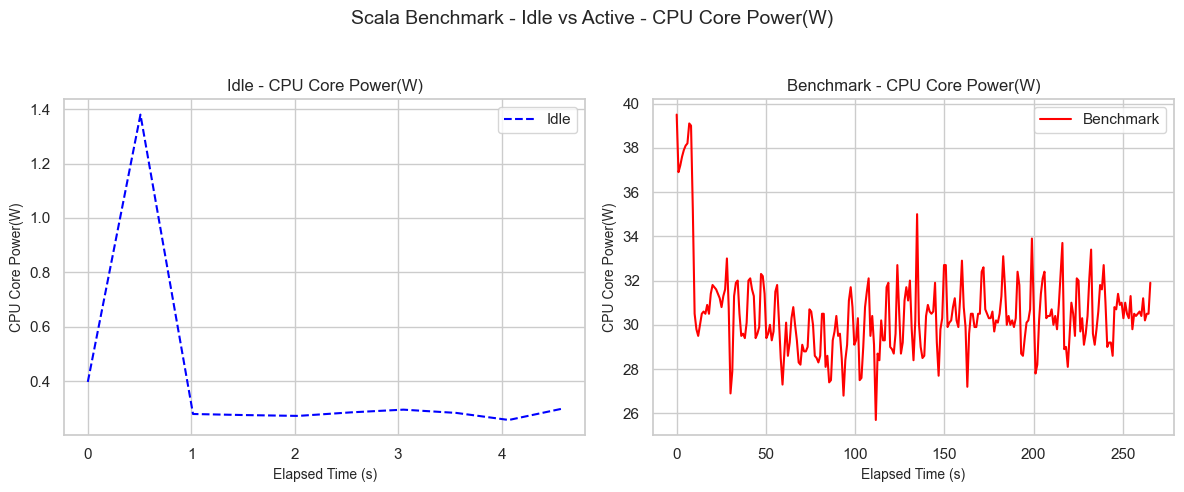

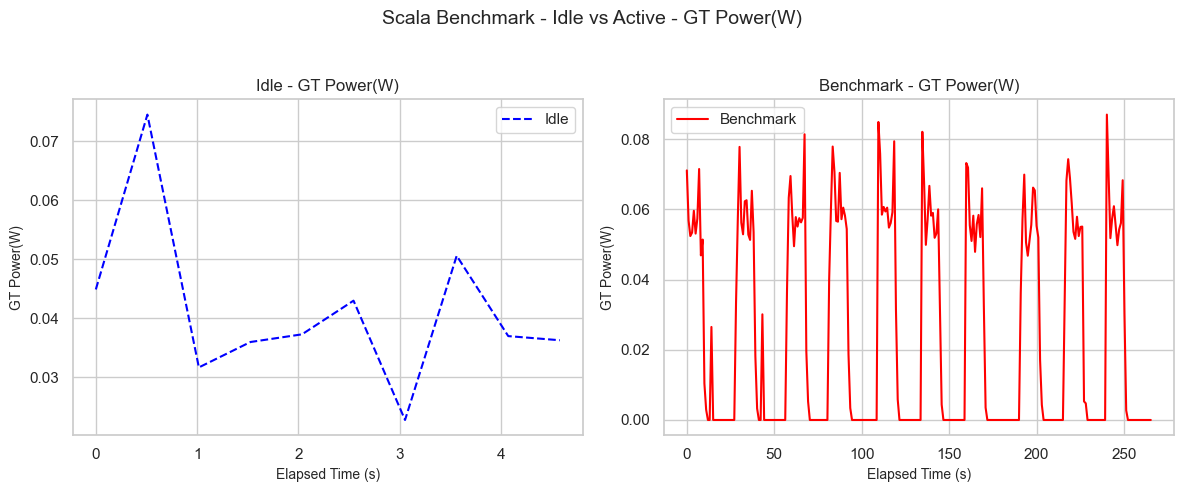

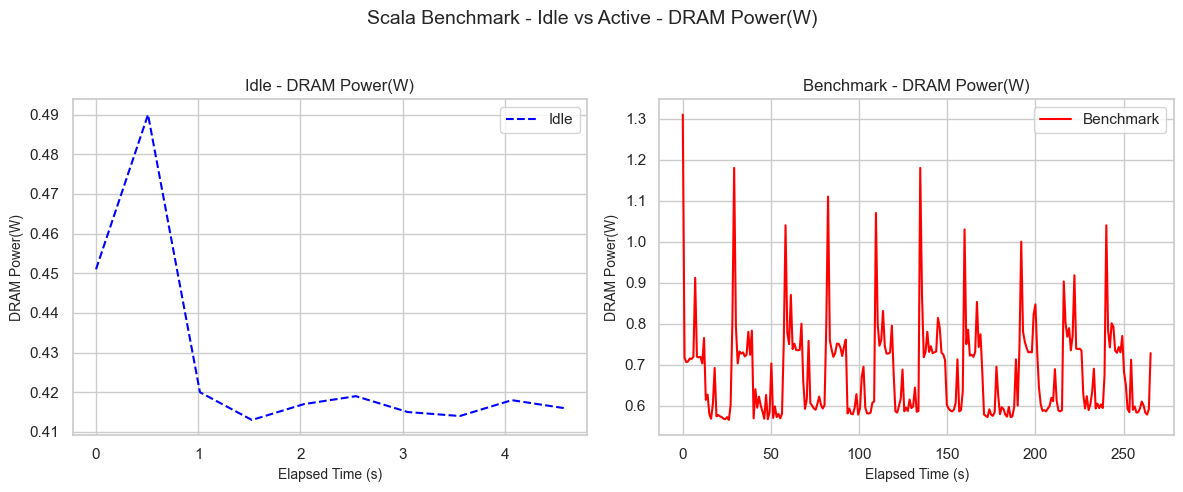

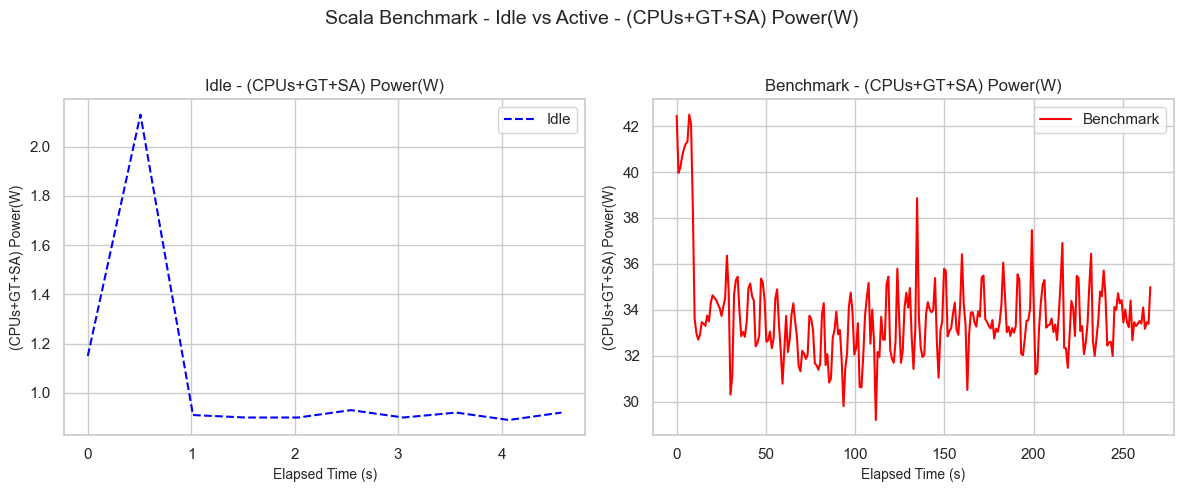

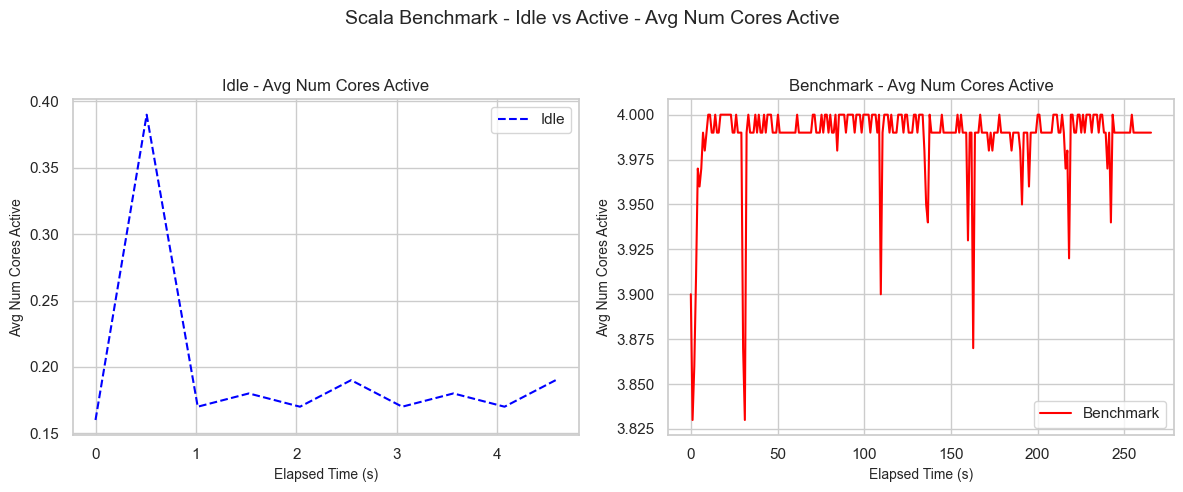

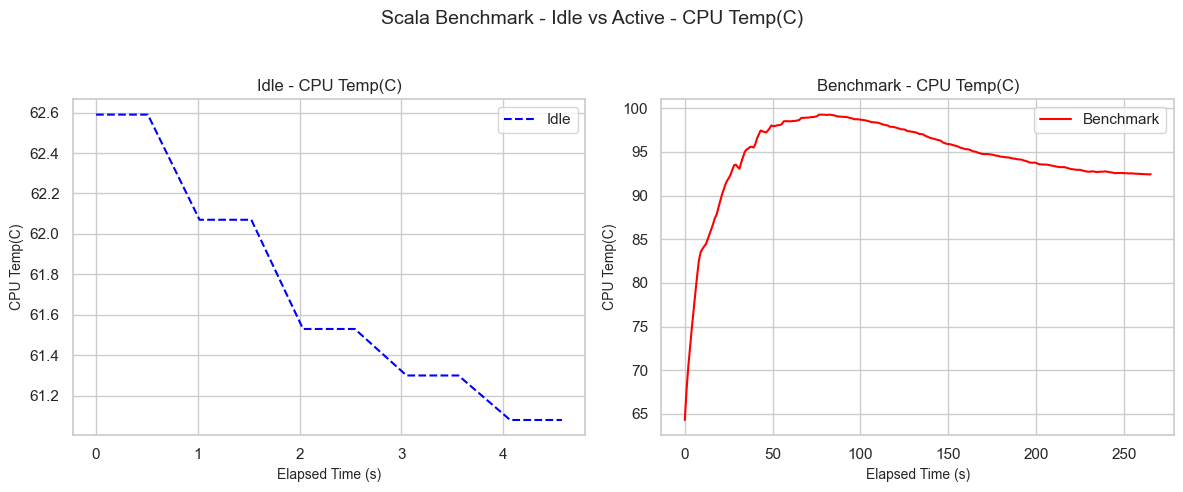

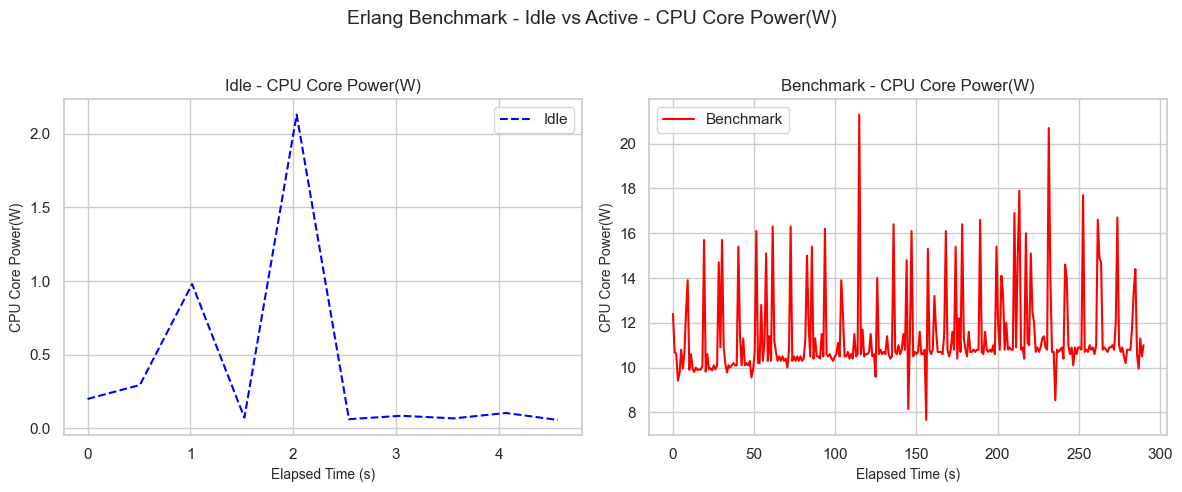

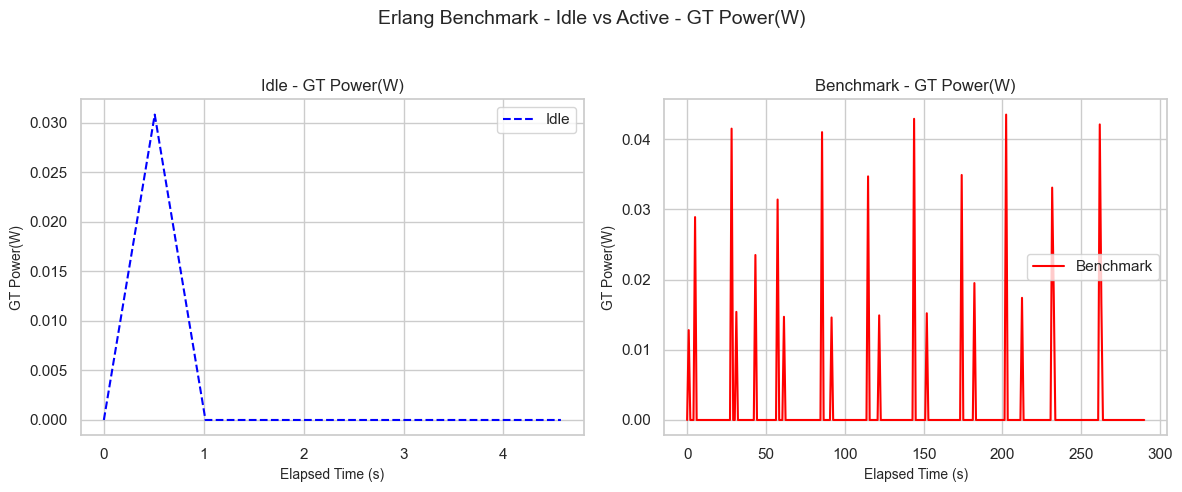

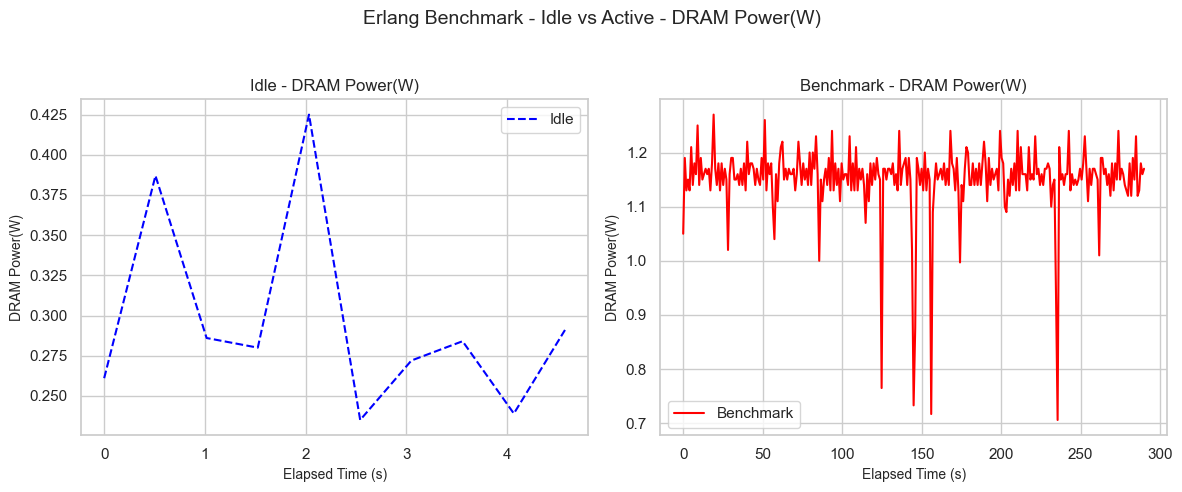

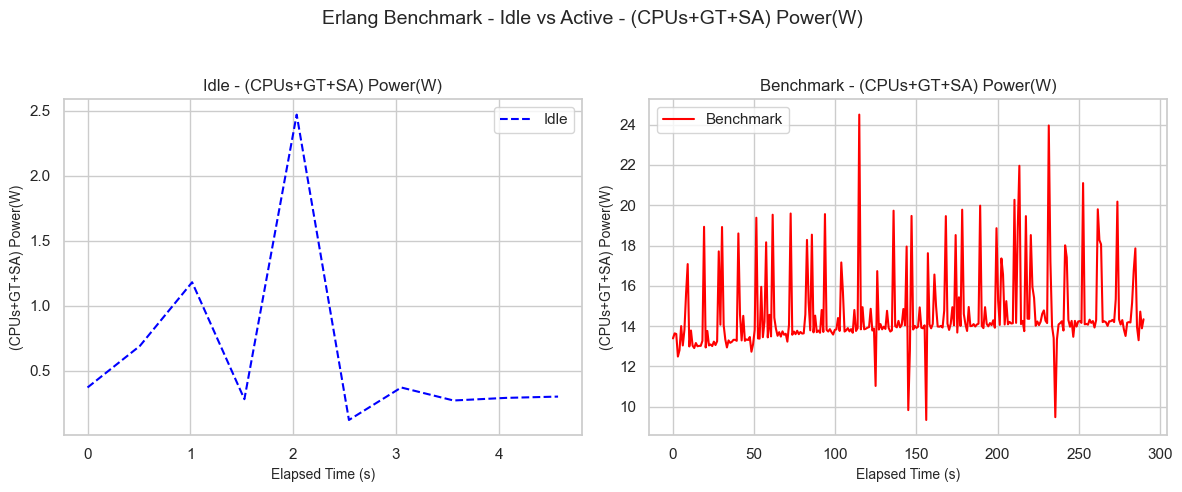

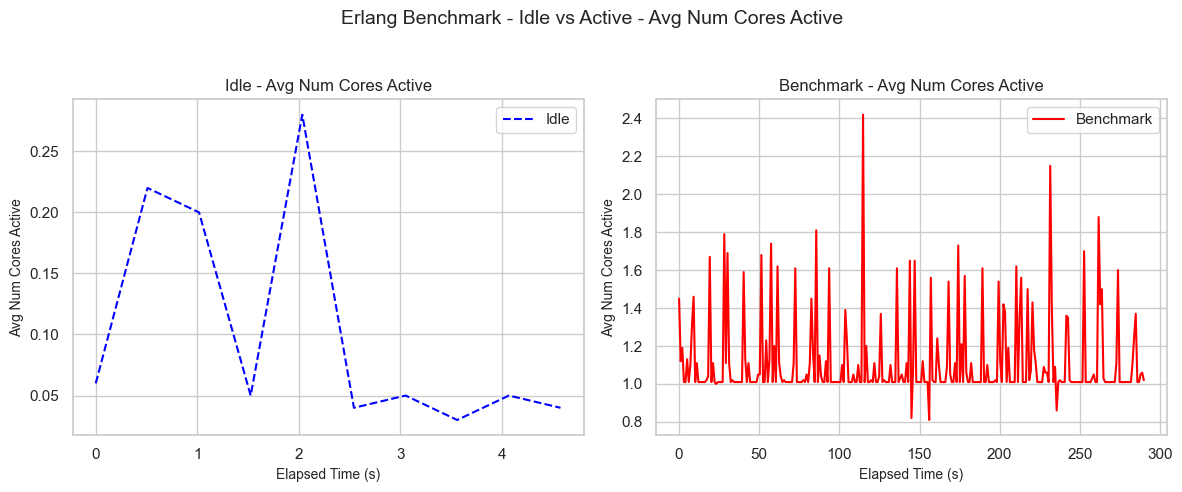

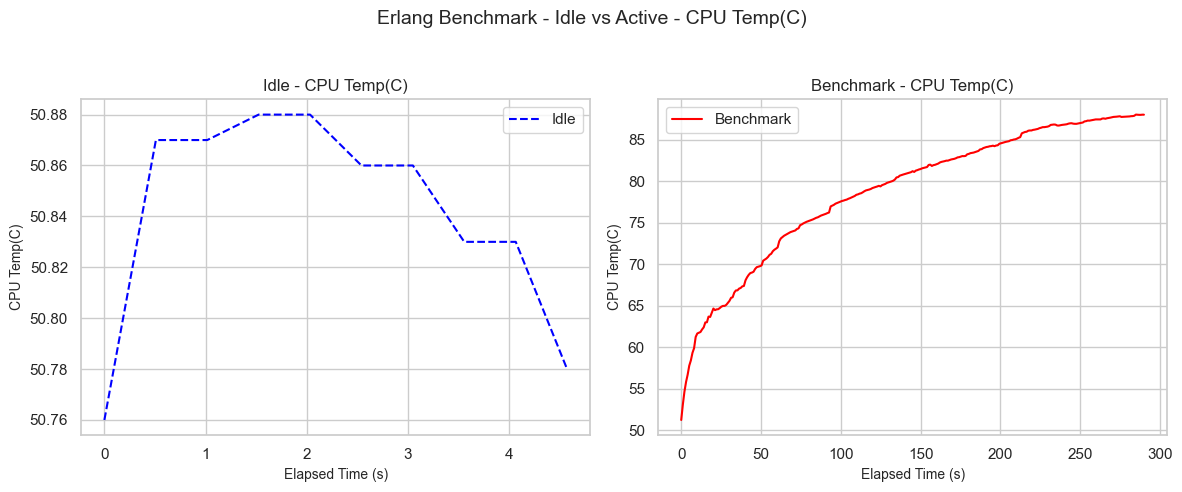

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

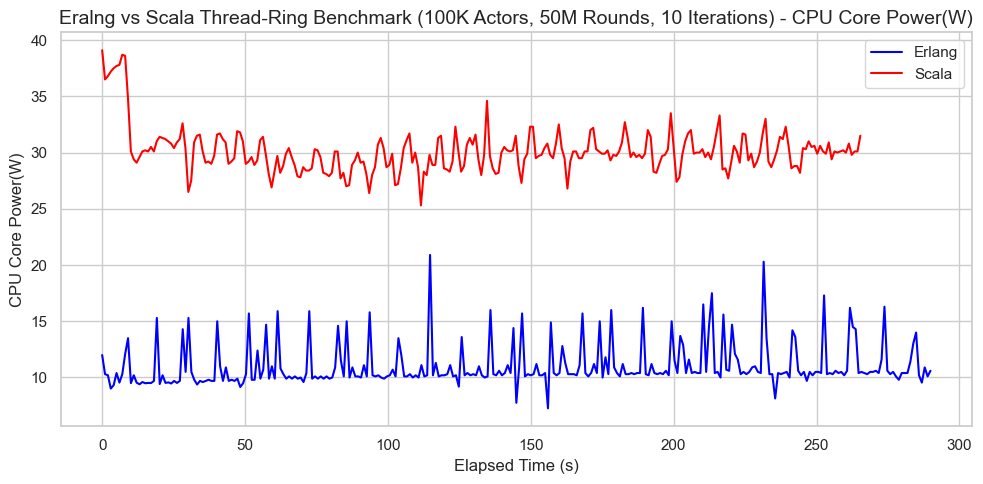

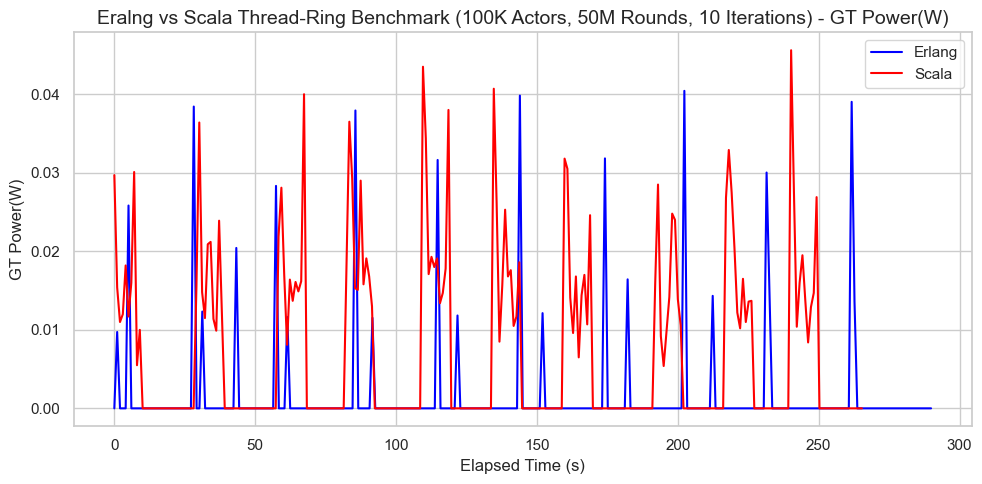

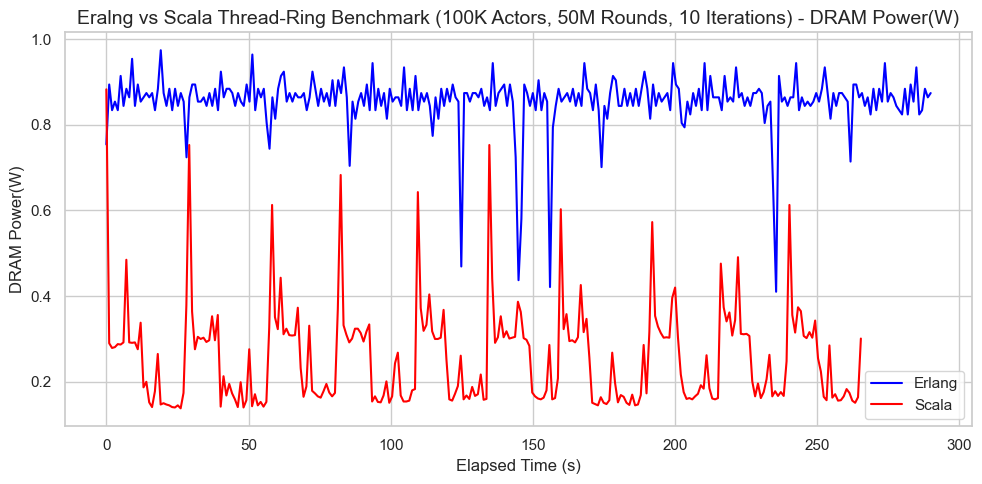

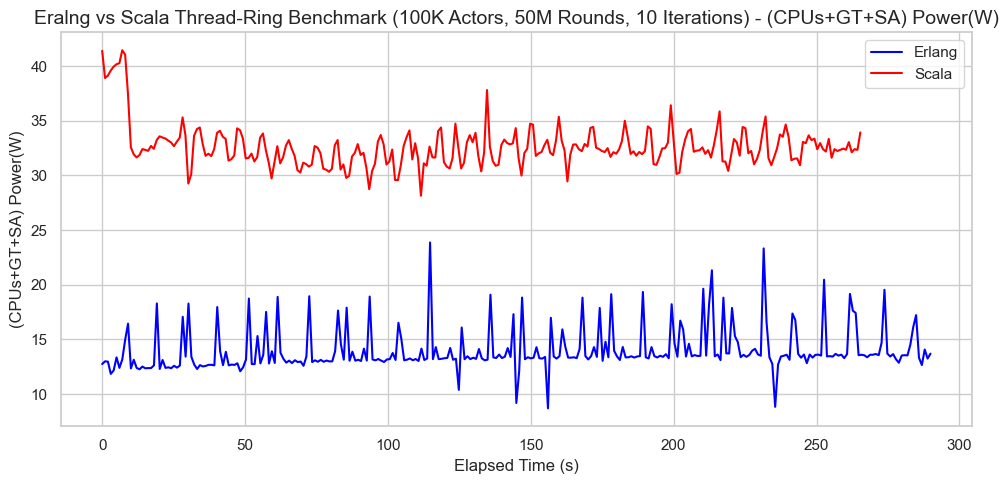

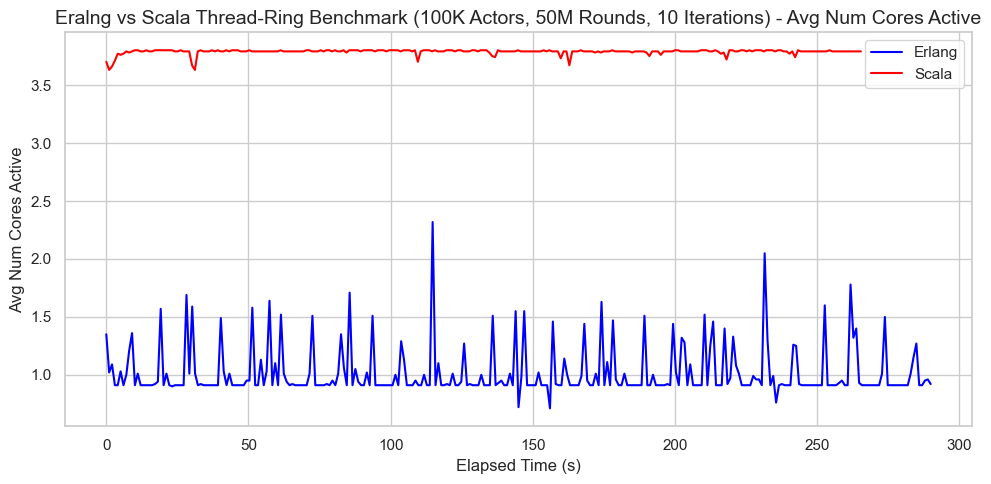

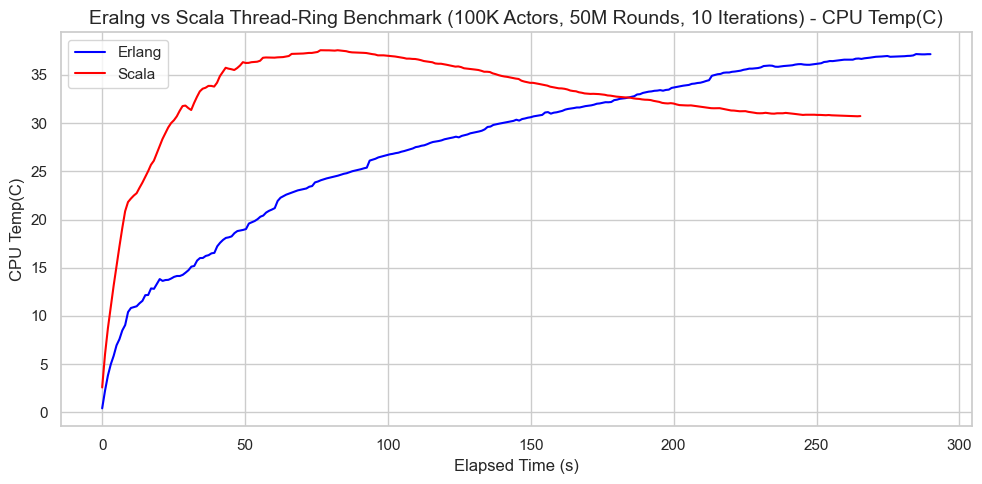

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.126579
GT Power(W)              -0.016843
DRAM Power(W)             0.255806
(CPUs+GT+SA) Power(W)    32.642849
CPU Temp(C)              32.760830
Avg Num Cores Active      3.790698
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        11.003789
GT Power(W)              -0.001154
DRAM Power(W)             0.855353
(CPUs+GT+SA) Power(W)    14.003543
CPU Temp(C)              27.957792
Avg Num Cores Active      1.013433
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/2/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 8092.251299814794 Joules
Erlang Benchmark: 3449.7800286211504 Joules
